#World Cup in Cape Town:

 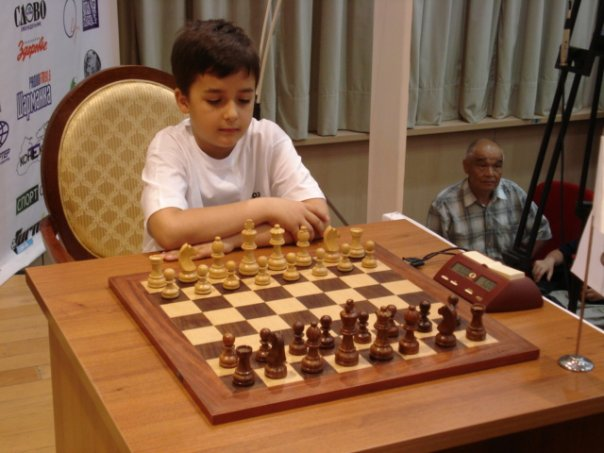

#Intorduction


This data analytics project is a deep dive into the world of chess, analyzing and predicting the performance of chess players, countries, and chess events. The motivation for choosing this project comes from my background as a former professional chess player, which has provided me with a wealth of understanding and insight into the game. I played professionally from 2007 to 2016, achieving multiple championships in Ukraine in the U-14 and U-16 categories. Additionally, I had the honor of participating in the World Championship U-16 in Cape Town.

After transitioning to Ireland, I shifted my focus to teaching chess, working with children and various chess clubs, particularly in Kerry. I am currently one of the coaches at [chess.ie](https://www.chess.ie) and have had the privilege of coaching teams that have earned impressive rankings in regional competitions. For instance, I contributed to my team's victory in the Munster League Division 2 (1st place), as well as securing the 2nd place in Division 1. Additionally, I also champion of the Munster League Championship Division 1 in 2024 and the Tralee Chess Championship from 2022 to nowadays.

My extensive experience in chess, both as a competitor and as a coach, along with my deep understanding of chess history, made me keen to explore how data analytics can help us analyze and predict chess outcomes. In this project, I aim to apply advanced data analytics techniques to assess historical data, identify patterns, and predict the future performance of chess players and countries. Through this project, I will be able to combine my practical chess experience with the power of data science to make informed predictions that could have a meaningful impact on the chess community.

This project will also allow me to dive deeper into historical trends and player data, uncovering insights that may inform decisions for players, coaches, and even chess federations around the world. By leveraging data, I hope to contribute to the broader understanding of competitive chess and assist in predicting who might be the next top chess players based on historical performance trends.

#Tralee Chess Club :
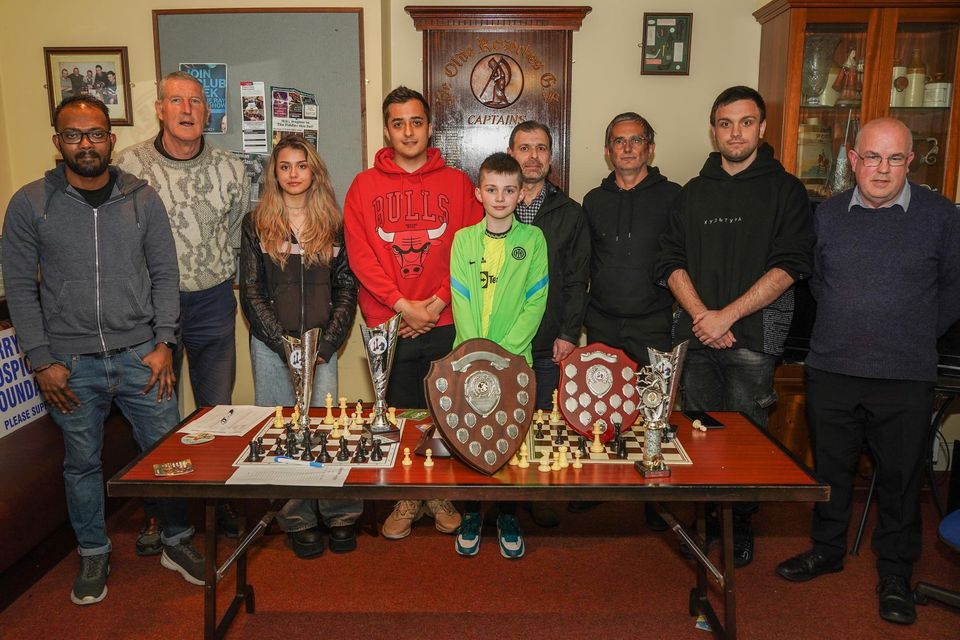

#Tralee Chess Club Championship
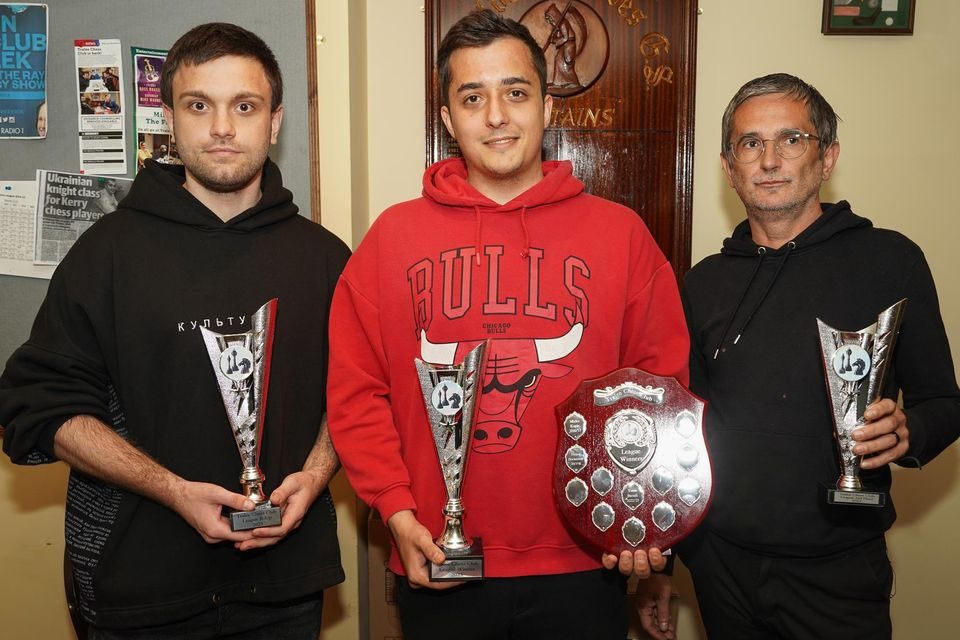

#This is my graph from lichess.org where I am playing chess :
Unfortunately they can't provide access to this data, so I attached a screenshot.

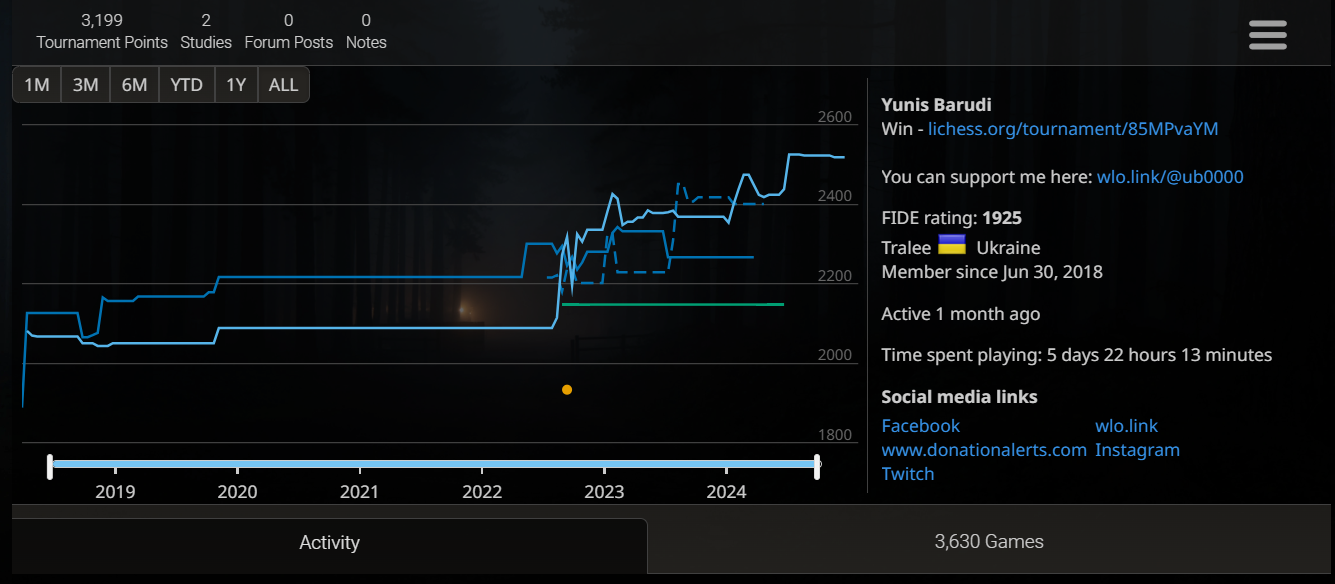



---



# Import Libraries and Load Data
I got this dataset from "https://www.kaggle.com/datasets/odartey/top-chess-players"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/sample_data/fide_historical.csv')
df.head()


,ranking_date,rank,name,title,country,rating,games,birth_year
0,27-07-00,1,"Kasparov, Garry",g,RUS,2849,35,1963
1,27-07-00,2,"Kramnik, Vladimir",g,RUS,2770,23,1975
2,27-07-00,3,"Anand, Viswanathan",g,IND,2762,23,1969
3,27-07-00,4,"Morozevich, Alexander",g,RUS,2756,28,1977
4,27-07-00,5,"Adams, Michael",g,ENG,2755,38,1971


#Find Maximum Rating of Magnus Carlsen
Magnus Carlsen is a Norwegian chess grandmaster widely regarded as one of the greatest players in the history of the game. Born on November 30, 1990, in Tønsberg, Norway, Carlsen became a grandmaster at the age of 13. He claimed the World Chess Championship title in 2013 and successfully defended it multiple times, dominating both classical and rapid formats.

Known for his deep positional understanding and versatility, Carlsen has held the highest FIDE rating in history, peaking at 2882 in 2014. His influence extends beyond the chessboard, as he has also popularized chess globally through his online tournaments and collaborations with streaming platforms. In 2023, he voluntarily relinquished the classical world title but remains a powerhouse in the chess world.

#Why I choose Carlsen? Why Magnus is the greatest chess of all time?

#[Short video about Carlsen on Joe Rogan podcast](https://www.youtube.com/watch?v=59Kw9wVNQbU)

# [Hikaru Nakamura (world 2nd player) about Magnus](https://www.youtube.com/watch?v=fKn9fyKbDrE)



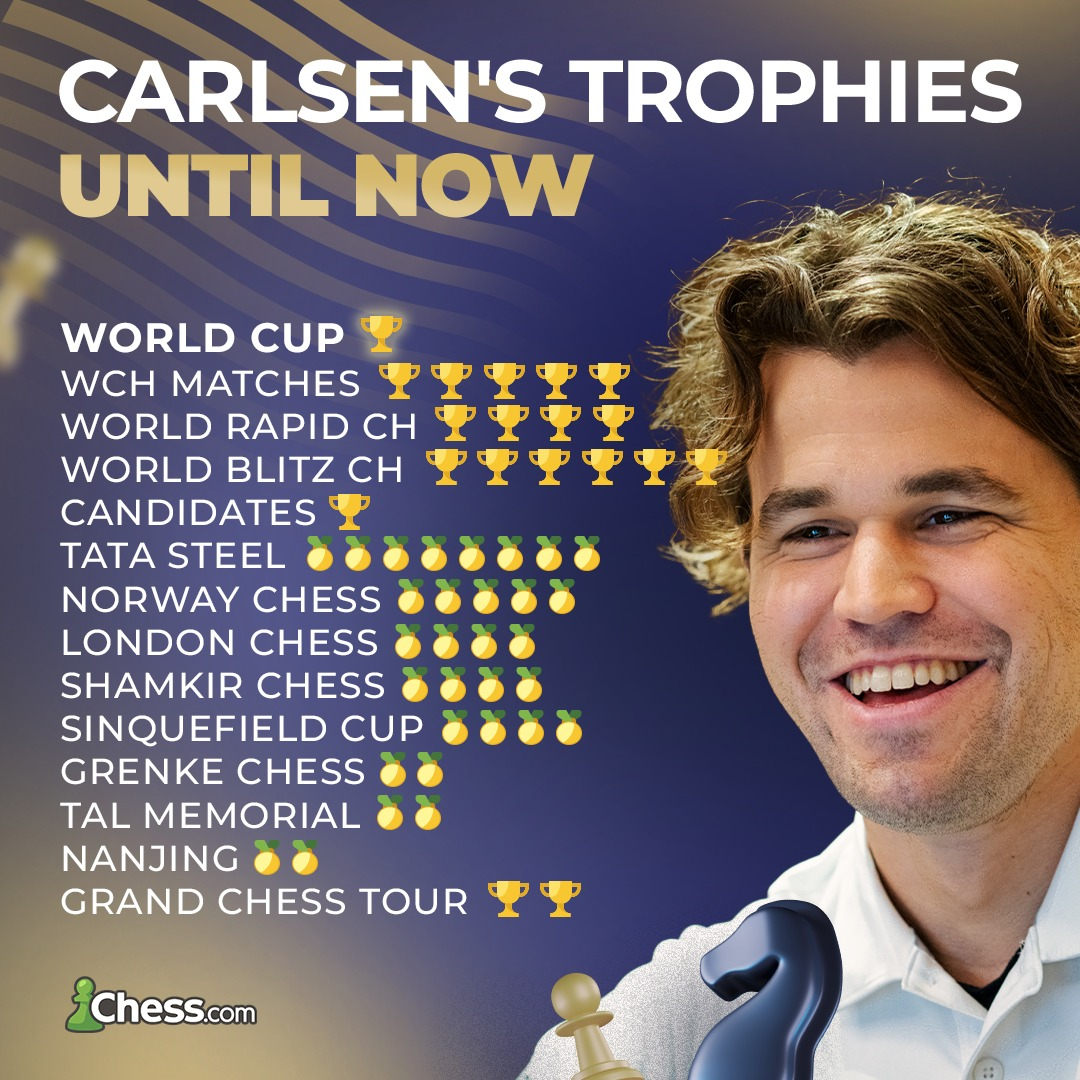

In [2]:
df.loc[df.loc[df['name'] == 'Carlsen, Magnus', ['rating']].idxmax()]


,ranking_date,rank,name,title,country,rating,games,birth_year
7675,27-05-14,1,"Carlsen, Magnus",g,NOR,2882,1,1990


# Basic Data Analysis
This code provides an overview of the ranking_date column in the DataFrame df. It calculates and prints:




1.   
The total number of unique ranking date entries.
2.  
The earliest date.
3.The latest date.




In [3]:
NUMBER_DATAPOINTS_ = df.ranking_date.nunique()
print('Number of rating list publications:\t%i' %NUMBER_DATAPOINTS_)
STARTDATE_=df.ranking_date.min()
print('Date of first publication:\t\t%s'%STARTDATE_)
ENDDATE_=df.ranking_date.max()
print('Date of last publication:\t\t%s'%ENDDATE_)

Number of rating list publications:	114
Date of first publication:		27-01-01
Date of last publication:		27-12-16


#This code analyzes the average chess player ratings over the years and visualizes the trend. Here's a summary:

Extract Year from ranking_date:

1.The year is extracted as the last two digits of the ranking_date string, converted to numeric, and adjusted to represent a full year (e.g., 21 becomes 2021).

2.Calculate Average Ratings Per Year:

The data is grouped by year, and the mean of the rating column is calculated for each year. The result is a new DataFrame containing the average rating for each year.

3.Plot the Trend:

A line plot is created to show how the average chess ratings (for the top 100 players) change over the years. The x-axis represents years, and the y-axis represents the average ratings.

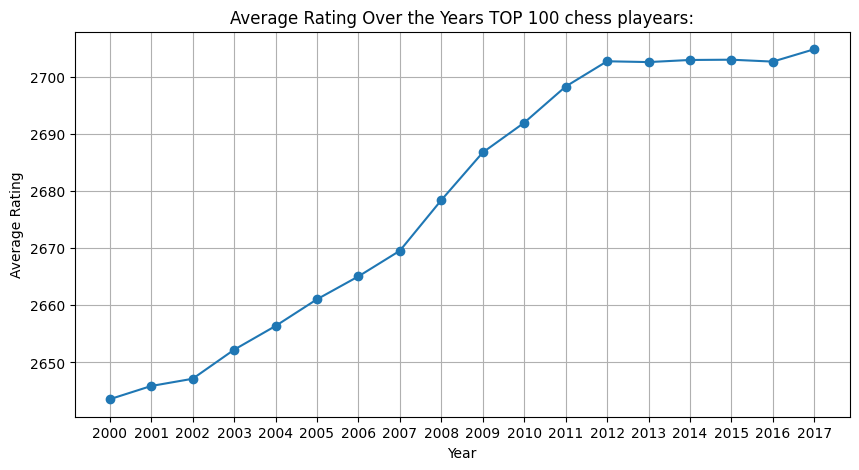

In [4]:
df['year'] = df['ranking_date'].str[-2:]

df['year'] = pd.to_numeric(df['year']) + 2000

average_rating_per_year = df.groupby('year')['rating'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(average_rating_per_year['year'], average_rating_per_year['rating'], marker='o')
plt.title('Average Rating Over the Years TOP 100 chess playears:')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(average_rating_per_year['year'])
plt.grid(True)
plt.show()

#This code specifically analyzes and visualizes Magnus Carlsen's chess ratings over the years.

1.Extract Year from ranking_date:

The last two digits of ranking_date are extracted and converted into full four-digit years.

2.Filter Data for Magnus Carlsen:

A subset of the DataFrame is created containing only rows where the player's name is "Carlsen, Magnus."

3.Plot Carlsen's Ratings:

A line plot is generated, showing Magnus Carlsen's chess ratings over the years. The x-axis represents the years, and the y-axis represents his ratings.

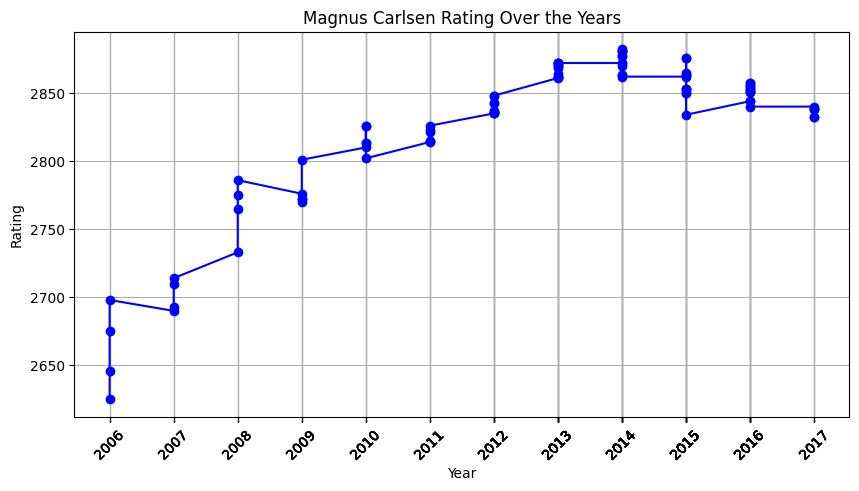

In [5]:
df['year'] = df['ranking_date'].str[-2:]

df['year'] = pd.to_numeric(df['year']) + 2000

carlsen_data = df[df['name'] == 'Carlsen, Magnus']
plt.figure(figsize=(10, 5))
plt.plot(carlsen_data['year'], carlsen_data['rating'], marker='o', color='blue')
plt.title('Magnus Carlsen Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.xticks(carlsen_data['year'], rotation=45)
plt.grid(True)
plt.show()

#This code plots the relationship between chess ratings and the number of games played. It uses a scatter plot to highlight individual players, filters players with ratings ≥ 2500, and overlays a regression trendline for this subset.

<ipython-input-49-c258573b2aff>:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


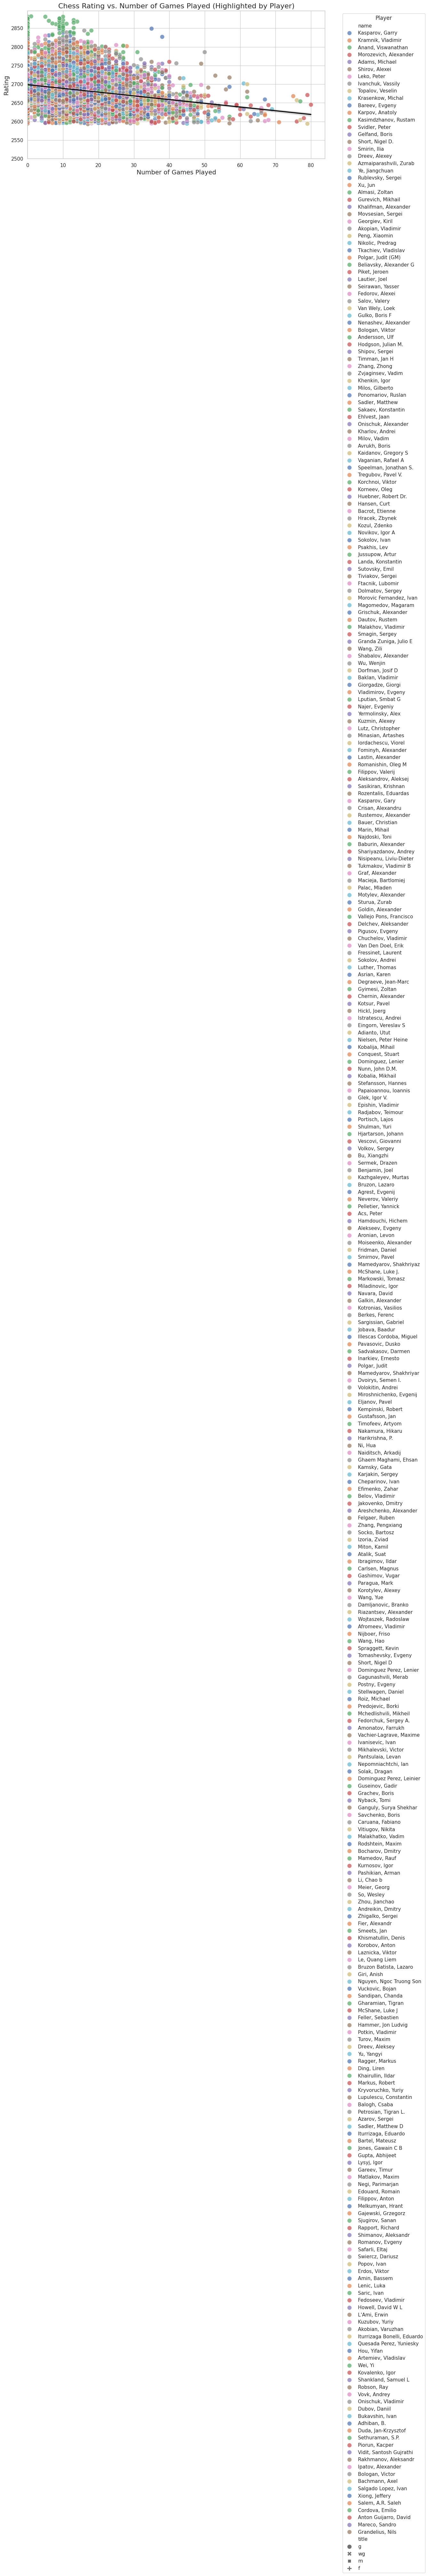

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df['year'] = df['ranking_date'].str[-2:]
df['year'] = pd.to_numeric(df['year']) + 2000

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

scatter = sns.scatterplot(data=df, x='games', y='rating', hue='name', style='title', s=100, palette='deep', alpha=0.7)

filtered_df = df[df['rating'] >= 2500]

sns.regplot(data=filtered_df, x='games', y='rating', scatter=False, color='black')

# Set the title and labels
plt.title('Chess Rating vs. Number of Games Played (Highlighted by Player)', fontsize=16)
plt.xlabel('Number of Games Played', fontsize=14)
plt.ylabel('Rating', fontsize=14)

# Create the legend
plt.legend(title='Player', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Set limits for the axes
plt.xlim(left=0)
plt.ylim(bottom=2500)

# Improve the layout and show the plot
plt.tight_layout()
plt.show()

#As a chess player myself, I decided to create a special dataset titled chess_events.csv to capture significant events in the chess world and their impact on the game.
This decision was motivated by my personal interest in tracking key milestones in the history of chess, both for top players and for broader cultural moments that influenced the chess community.

The dataset includes a variety of events, such as:

1.Player achievements, like Magnus Carlsen's retention of the World Championship in 2021 via tiebreaks.

2.Cultural contributions, including chess-related films and documentaries, such as the 2007 documentary "Bobby Fischer Against the World" or the 2020 Netflix series "The Queen's Gambit".

3.Major global impacts, like the influence of Covid-19 in 2020, which affected chess events and tournaments worldwide.

In [7]:
data_events = pd.read_csv('/content/sample_data/chess_events.csv')
data_events.head()


,Year,Country,Chess Player,Chess Event
0,2005,Bulgaria,Veselin Topalov,Won the FIDE World Chess Championship
1,2006,Russia,Vladimir Kramnik,Unified World Chess Championship title
2,2007,India,Viswanathan Anand,Won World Chess Championship
3,2008,India,Viswanathan Anand,Retained World Chess Championship
4,2009,Norway,Magnus Carlsen,Youngest World No. 1 at age 18


#I also created a dataset called chess_popularity.csv to track the growing popularity of chess over time using new user statistics from Chess.com and Google Analytics.
This dataset includes data on:

New user registrations on Chess.com (Number 1 chess website).

This dataset highlights how external events have influenced the rapid growth of chess, especially online

In [8]:
data_popularity = pd.read_csv('/content/sample_data/chess_popularity.csv')
data_popularity.head()

,Year,Month,Estimated Active Users
0,2007,January,0
1,2007,February,83
2,2007,March,167
3,2007,April,250
4,2007,May,333


#This code plots the chess popularity over time.
Based on the number of estimated active users on Chess.com. The x-axis represents the year, while the y-axis shows the estimated number of active users.
The plot helps visualize how the popularity of chess has evolved, with markers indicating key points in time.

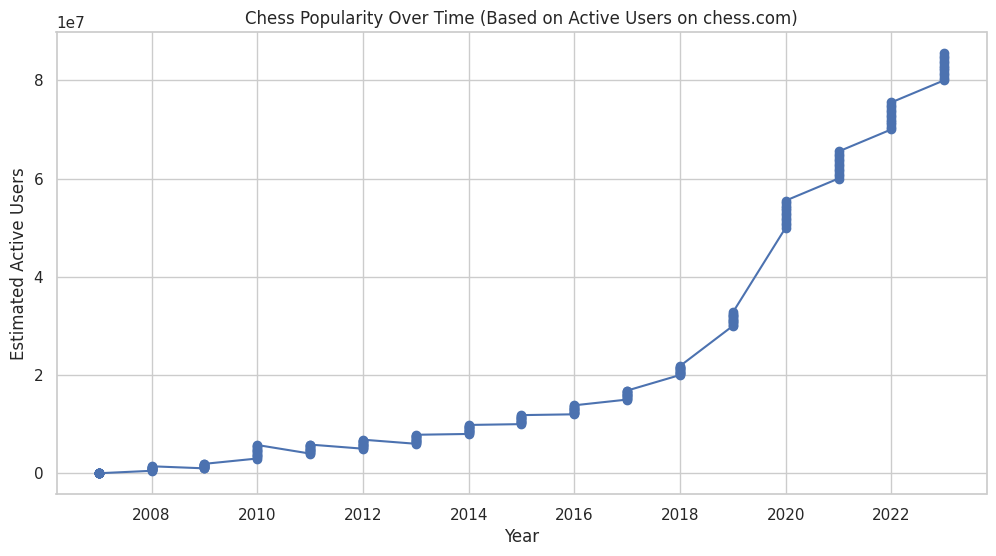

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data_popularity['Year'], data_popularity['Estimated Active Users'], marker='o')
plt.title('Chess Popularity Over Time (Based on Active Users on chess.com)')
plt.xlabel('Year')
plt.ylabel('Estimated Active Users')
plt.grid(True)

# Set y-axis limit

plt.show()

#This code calculates the yearly increase in active users by subtracting the previous year's value from the current year's (diff()).
It then identifies the year with the largest increase in active users by finding the maximum value in the Increase column.

Finally, it prints the year with the biggest boom in chess popularity based on the data.

The output will show the year when chess experienced its most significant surge in active users.

In [10]:
data_popularity = pd.read_csv('/content/sample_data/chess_popularity.csv')
data_popularity['Increase'] = data_popularity['Estimated Active Users'].diff()
year_biggest_boom = data_popularity.loc[data_popularity['Increase'].idxmax(), 'Year']

print(f"The year with the biggest boom in chess popularity (based on active users) was: {year_biggest_boom}")

The year with the biggest boom in chess popularity (based on active users) was: 2020


#This code filters the chess_events.csv dataset to show only the events from 2020 and displays them.








In [11]:
data_events = pd.read_csv('/content/sample_data/chess_events.csv')
data_events_2020 = data_events[data_events['Year'] == 2020]
data_events_2020

,Year,Country,Chess Player,Chess Event
17,2020,WorldWide,NaN,Covid
18,2020,USA,NaN,"""The Queen's Gambit"" series"


#This code loads the world_population.csv dataset from https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset.
Calculates each country's percentage of the total world population for 2020, and adds it as a new column.

It then sorts the data by rank and prints the sorted dataset. Finally, it saves the sorted data to a new CSV file, world_population_sorted.csv.


In [12]:
data_population = pd.read_csv('/content/sample_data/world_population.csv')
total_population = data_population['2020 Population'].sum()
data_population['World Population Percentage'] = (data_population['2020 Population'] / total_population) * 100
data_population_sorted = data_population.sort_values(by='Rank')
print(data_population_sorted)

data_population_sorted.to_csv("sample_data/world_population_sorted.csv", index=False)

     Rank CCA3 Country/Territory           Capital      Continent  \
41      1  CHN             China           Beijing           Asia   
92      2  IND             India         New Delhi           Asia   
221     3  USA     United States  Washington, D.C.  North America   
93      4  IDN         Indonesia           Jakarta           Asia   
156     5  PAK          Pakistan         Islamabad           Asia   
..    ...  ...               ...               ...            ...   
137   230  MSR        Montserrat            Brades  North America   
64    231  FLK  Falkland Islands           Stanley  South America   
150   232  NIU              Niue             Alofi        Oceania   
209   233  TKL           Tokelau          Nukunonu        Oceania   
226   234  VAT      Vatican City      Vatican City         Europe   

     2020 Population  World Population Percentage  
41        1424929781                    18.176862  
92        1396387127                    17.812763  
221        3359



---



#Here I loaded two datasets: fide_historical.csv (FIDE player rankings) and world_population_sorted.csv (world population data). It then:

1.Extracts the year from ranking_date and filters data for 2017.

2.Counts the number of unique chess players per country.

3.Merges the players data with world population data.

4.Calculates the percentage of chess players in each country relative to the world population.

5.Sorts the countries by this percentage.

6.Displays the sorted list of countries along with their chess player percentages, formatted to six decimal places.

In [13]:
import pandas as pd

fide_historical = pd.read_csv('/content/sample_data/fide_historical.csv')
world_population_sorted = pd.read_csv('/content/sample_data/world_population_sorted.csv')

# Extract the year from the ranking_date and filter for the year 2017
fide_historical['Year'] = fide_historical['ranking_date'].str[-2:]
fide_2017 = fide_historical[fide_historical['Year'] == '17'].drop_duplicates(subset='name')

# Group by country and count the number of unique players
players_per_country = fide_2017.groupby('country').size().reset_index(name='Number_of_Players')

# Merge with world population data
merged_data = pd.merge(players_per_country, world_population_sorted, left_on='country', right_on='CCA3')

# Calculate the percent of chess players
merged_data['Percent_of_Chess_Players'] = (merged_data['Number_of_Players'] / merged_data['2020 Population']) * 100

# Sort merged_data
sorted_data = merged_data.sort_values(by='Percent_of_Chess_Players', ascending=False)

sorted_data['Percent_of_Chess_Players'] = sorted_data['Percent_of_Chess_Players'].apply(lambda x: f"{x:.6f}%")
print(sorted_data[['Country/Territory', 'Percent_of_Chess_Players']])

   Country/Territory Percent_of_Chess_Players
1            Armenia                0.000143%
3         Azerbaijan                0.000049%
15            Israel                0.000046%
13           Hungary                0.000041%
12           Georgia                0.000027%
8     Czech Republic                0.000019%
16            Norway                0.000019%
19            Russia                0.000016%
23           Ukraine                0.000016%
20            Serbia                0.000014%
2            Austria                0.000011%
4            Belarus                0.000010%
21            Sweden                0.000010%
7               Cuba                0.000009%
11            France                0.000006%
17              Peru                0.000006%
18            Poland                0.000005%
10             Spain                0.000004%
26         Venezuela                0.000004%
25        Uzbekistan                0.000003%
24     United States              



---



#In this code, I used a decision tree classifier to predict if a country is Armenia based on features like population and number of chess players. Here's what I did:

1. Data Preparation: I loaded the datasets, filtered for 2017, grouped by country, and merged player data with world population data.
2. Feature Engineering: I created a binary target variable (`Is_Armenia`) and selected features like population and number of players.
3. Model Training: I trained a decision tree and evaluated it using accuracy.
4. Visualization: I created a bar plot showing the percentage of chess players by country in 2017.

The result includes the decision tree rules, model accuracy, and a bar plot of chess player percentages.

#I chose a Decision Tree because it’s easy to interpret and handles both numerical and categorical data well. It can capture non-linear relationships and doesn't require feature scaling.

This made it ideal for predicting if a country is Armenia based on factors like population and chess players, while providing clear, understandable rules.

|--- World Population Percentage <= 0.04
|   |--- class: 1
|--- World Population Percentage >  0.04
|   |--- class: 0

Model Accuracy: 1.00


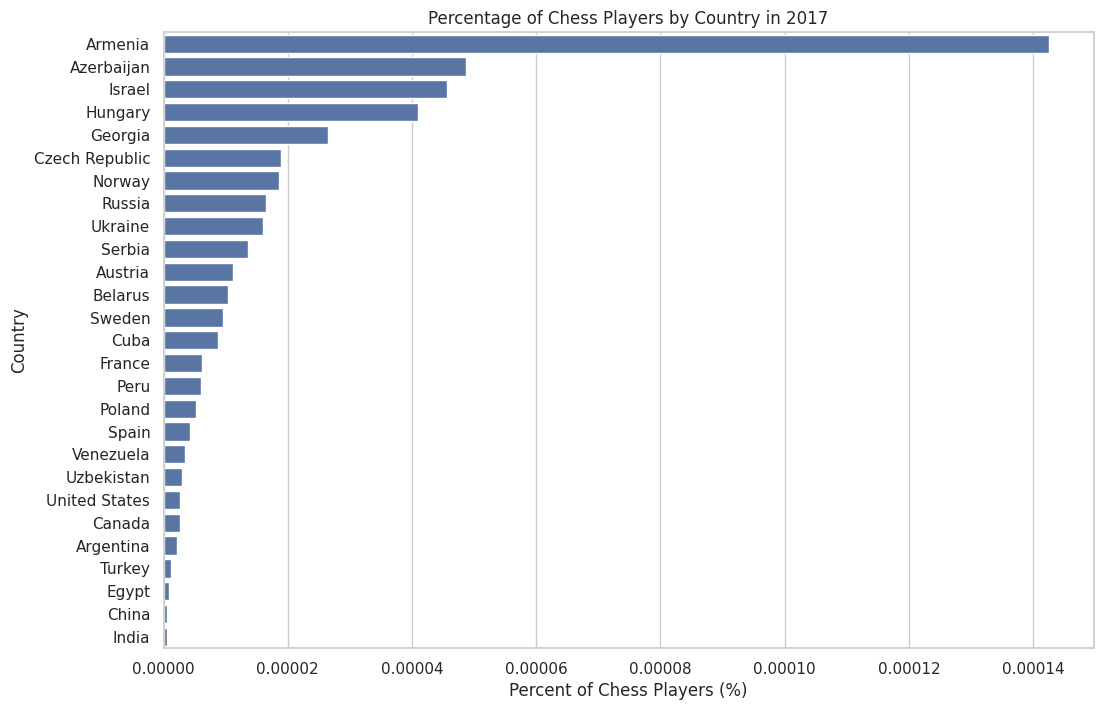

In [14]:
#Can we predict whether a country is Armenia based on factors like its population size,
#percentage of world population, and number of chess players?

from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

fide_historical = pd.read_csv('/content/sample_data/fide_historical.csv')
world_population_sorted = pd.read_csv('/content/sample_data/world_population_sorted.csv')
fide_historical['Year'] = fide_historical['ranking_date'].str[-2:]
fide_2017 = fide_historical[fide_historical['Year'] == '17'].drop_duplicates(subset='name')

# Group by country and count the number of unique players
players_per_country = fide_2017.groupby('country').size().reset_index(name='Number_of_Players')

# Merge with world population data
merged_data = pd.merge(players_per_country, world_population_sorted, left_on='country', right_on='CCA3')
merged_data['Percent_of_Chess_Players'] = (merged_data['Number_of_Players'] / merged_data['2020 Population']) * 100
merged_data['Is_Armenia'] = (merged_data['Country/Territory'] == 'Armenia').astype(int)

# Select 2020 population, population percentage and number of players for the decision tree
features = ['2020 Population', 'World Population Percentage', 'Number_of_Players']
X = merged_data[features]
y = merged_data['Is_Armenia']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Display the decision tree
tree_rules = export_text(clf, feature_names=features)
print(tree_rules)
accuracy = clf.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

plt.figure(figsize=(12, 8))
sns.barplot(x='Percent_of_Chess_Players', y='Country/Territory', data=merged_data.sort_values(by='Percent_of_Chess_Players', ascending=False))
plt.xlabel('Percent of Chess Players (%)')
plt.ylabel('Country')
plt.title('Percentage of Chess Players by Country in 2017')
plt.show()

Armenia's success in chess is a direct result of their chess-in-schools program, which introduces the game to children from a young age. This initiative has significantly contributed to the development of strong chess skills and the nurturing of future chess champions. The country's commitment to chess education has played a pivotal role in maintaining Armenia's dominance in international chess competitions. This was confirmed through the analysis in my project.



---




#In this code, I used K-Means clustering to analyze how countries' populations and world population percentages relate to their representation in the chess player dataset. Here's what I did:

1.Data Selection: I selected the features: Number of Players, 2020 Population, and World Population Percentage for clustering.

2.Scaling: I scaled the features using StandardScaler to ensure all features have the same scale and avoid bias in clustering.

3.Elbow Method: I applied the elbow method to determine the optimal number of clusters, which helps identify the best grouping of countries based on the features.

4.K-Means Clustering: I performed K-Means clustering with the optimal number of clusters, then assigned each country to a cluster.

5.Cluster Analysis: I analyzed and printed out the countries in each cluster, showing their number of players, population, and world population percentage.

6.PCA Visualization: To visualize the clusters, I applied Principal Component Analysis (PCA) to reduce the dimensionality and plotted the clusters in a 2D space.
This analysis helped me group countries based on their demographic and chess player data to see if there are any patterns in how these factors are related.


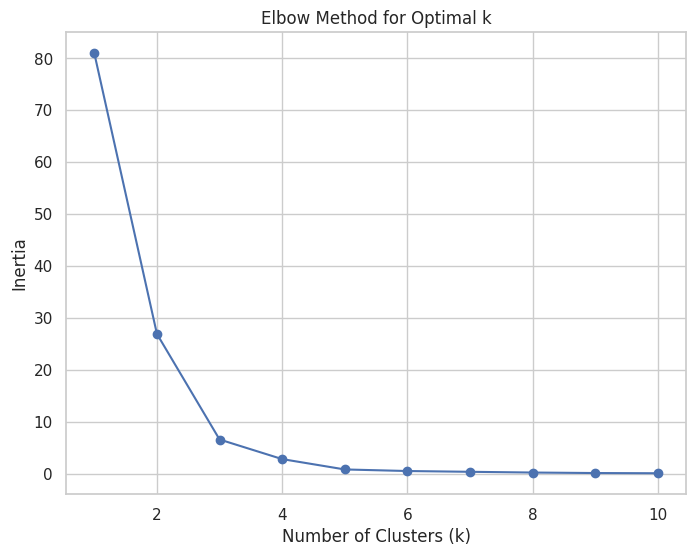


Cluster 0:
  Country/Territory  Number_of_Players  2020 Population  \
0         Argentina                  1         45036032   
1           Armenia                  4          2805608   
2           Austria                  1          8907777   
3        Azerbaijan                  5         10284951   
4           Belarus                  1          9633740   

   World Population Percentage  
0                     0.574494  
1                     0.035789  
2                     0.113630  
3                     0.131198  
4                     0.122891  

Cluster 1:
   Country/Territory  Number_of_Players  2020 Population  \
6              China                  9       1424929781   
14             India                  7       1396387127   

    World Population Percentage  
6                     18.176862  
14                    17.812763  

Cluster 2:
   Country/Territory  Number_of_Players  2020 Population  \
19            Russia                 24        145617329   

    Wor

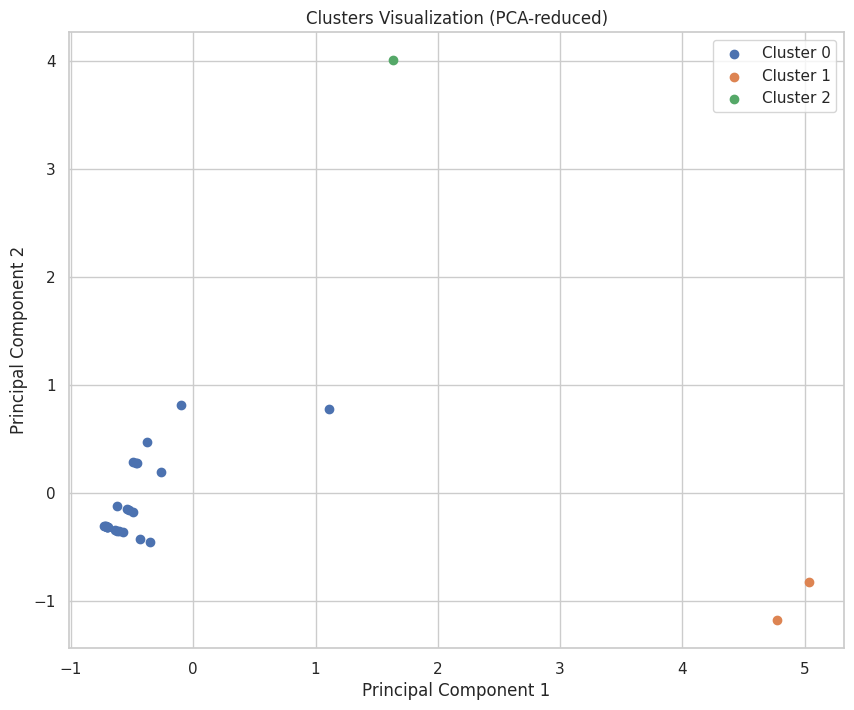

In [15]:
#How do countries' populations and world population percentages relate to
#their representation in the dataset as measured by the number of players?

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features_for_clustering = ['Number_of_Players', '2020 Population', 'World Population Percentage']
if not all(feature in merged_data.columns for feature in features_for_clustering):
    raise ValueError(f"Missing required features: {features_for_clustering}")

X_cluster = merged_data[features_for_clustering]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Ensure scaling is successful
if pd.DataFrame(X_scaled).isnull().any().any():
    raise ValueError("Scaling resulted in NaN or infinite values.")

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Choose the optimal number of clusters (based on the elbow method)
optimal_k = 3  # Replace with your observation from the plot

# Perform KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
merged_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the clusters
for cluster in range(optimal_k):
    cluster_data = merged_data[merged_data['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(cluster_data[['Country/Territory', 'Number_of_Players', '2020 Population', 'World Population Percentage']].head())

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):
    plt.scatter(
        X_pca[merged_data['Cluster'] == cluster, 0],
        X_pca[merged_data['Cluster'] == cluster, 1],
        label=f'Cluster {cluster}'
    )

plt.title('Clusters Visualization (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


#The clustering results show how countries group based on population and number of chess players:

### **Cluster 0:**
- Countries like Argentina, Armenia, and Austria have small populations and few chess players, representing a small fraction of the world population.

###** Cluster 1:**
- China and India are highly populous but have relatively few chess players compared to their large populations. They represent a significant portion of the global population but a small share of chess players.

### **Cluster 2:**
- Russia stands out with a moderate population but a high number of chess players, showing its strong chess presence relative to its population.

### **Conclusion**:
- *Cluster 0* includes countries with small populations and moderate chess representation.  
- *Cluster 1* includes large countries with relatively low chess representation.  
- *Cluster 2* highlights Russia, with a high number of chess players relative to its population.

#Note
The most interesting aspect right now is the ongoing **Chess Championship match** between a Chinese and an Indian player. However, neither of them is in my 2017 dataset. In 2017, **Gukesh**, the Indian challenger, was just **11 years old**, and the Chinese grandmaster wasn't highly ranked at the time.

Gukesh - https://www.reddit.com/r/chess/comments/1h5eye8/picture_of_gukesh_then_aged_11/#lightbox



---




#In this code, I used a **Random Forest Regressor** to predict chess player ratings based on several features like rank, games played, age, and more.

1. Data Preprocessing: The dataset is cleaned and transformed, including converting dates and calculating players' ages. I also created a new feature, 'rank_games_interaction', to capture combined effects between ranking and the number of games played.
   
2. Model Training: I trained a Random Forest Regressor on the cleaned data to predict the rating of players. This is done by splitting the data into training and testing sets.

3. Model Evaluation: The model's performance is evaluated using three metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²).

4. Prediction: I predicted ratings for all players, identified the player with the highest predicted rating, and visualized the actual vs. predicted ratings with scatter plots.

5. Residual Analysis: I plotted the residual (difference between actual and predicted ratings) for the best-predicted player to check the model's prediction accuracy.
.



#I chose **Random Forest Regressor** over a **Decision Tree** because Random Forest combines multiple decision trees to reduce overfitting and improve accuracy.

While a decision tree can work well, it's more prone to overfitting, especially with complex datasets like this one. Random Forest's ensemble approach creates a more robust and reliable model by averaging predictions, making it more suitable for predicting chess player ratings.

Model Performance on Test Set:
MAE: 2.72
MSE: 37.55
R²: 0.98
Best Predicted Player:
The best predicted player is: So, Wesley
Predicted Rating: 2809.13


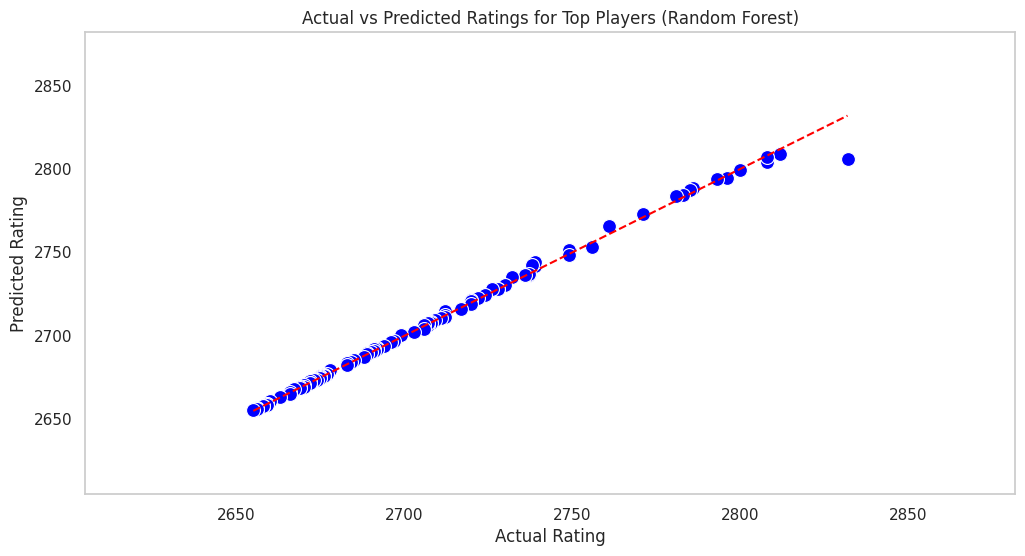

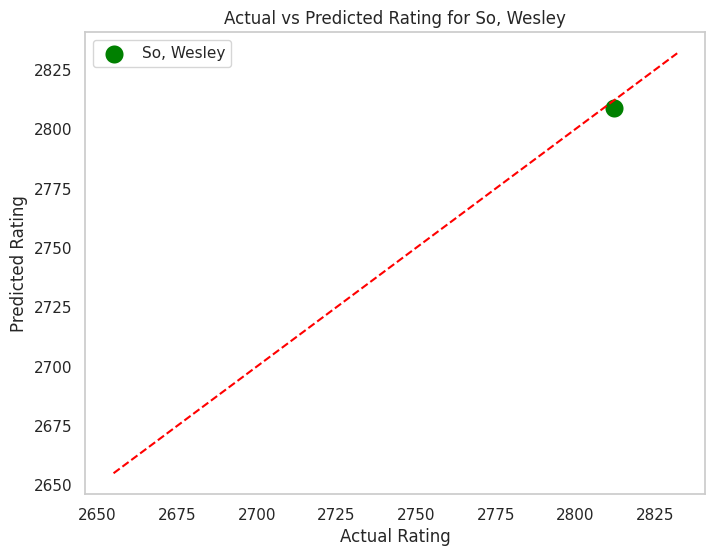

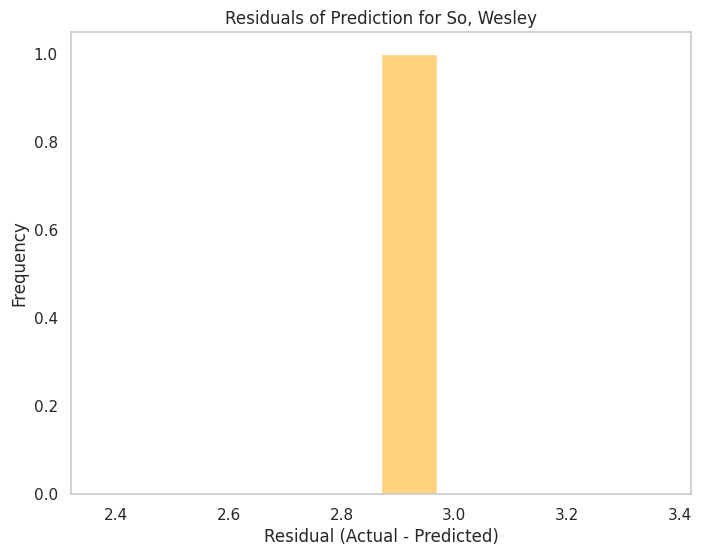

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

fide_historical = pd.read_csv('/content/sample_data/fide_historical.csv')

# Select only the last 100 rows (to avoid using too many old records)
fide_historical = fide_historical.tail(100)

fide_historical = fide_historical.dropna(subset=['rank', 'games', 'birth_year', 'rating'])

# Convert the 'ranking_date' column to a datetime format for easier manipulation
fide_historical['ranking_date'] = pd.to_datetime(fide_historical['ranking_date'], format='%d-%m-%y')

# Calculate each player's age based on the current year and their birth year
current_year = datetime.now().year
fide_historical['age'] = current_year - fide_historical['birth_year']

# Create a new feature that represents the interaction between 'rank' and 'games'
# to capture any combined effect between the two features
fide_historical['rank_games_interaction'] = fide_historical['rank'] * fide_historical['games']

# Define the features (X) and the target variable (y)
X = fide_historical[['rank', 'games', 'age', 'rank_games_interaction', 'title', 'country']]
y = fide_historical['rating']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['rank', 'games', 'age', 'rank_games_interaction']),  # Keep numeric columns as they are
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['title', 'country'])  # OneHotEncode the categorical columns
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocess the features (both numerical and categorical)
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))  # Apply RandomForestRegressor
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model performance using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²)
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error (average error)
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error (squared error)
r2 = r2_score(y_test, y_pred)  # R-squared (how well the model fits the data)

print(f"Model Performance on Test Set:\nMAE: {mae:.2f}\nMSE: {mse:.2f}\nR²: {r2:.2f}")

# Make predictions for all players in the dataset
fide_historical['predicted_rating'] = model.predict(X)

# Remove duplicate entries for the same player based on their name
fide_historical_unique = fide_historical.drop_duplicates(subset='name')
best_predicted_player = fide_historical_unique.loc[fide_historical_unique['predicted_rating'].idxmax()]

print("Best Predicted Player:")
print(f"The best predicted player is: {best_predicted_player['name']}")
print(f"Predicted Rating: {best_predicted_player['predicted_rating']:.2f}")

# 1. Scatter plot of actual vs predicted ratings for all players
plt.figure(figsize=(12, 6))
sns.scatterplot(x=fide_historical_unique['rating'], y=fide_historical_unique['predicted_rating'], color='blue', s=100)

min_rating = min(fide_historical_unique['rating'].min(), fide_historical_unique['predicted_rating'].min())
max_rating = max(fide_historical_unique['rating'].max(), fide_historical_unique['predicted_rating'].max())
plt.plot([min_rating, max_rating], [min_rating, max_rating], color='red', linestyle='--')

# Set plot limits dynamically based on data
plt.xlim(min_rating - 50, max_rating + 50)
plt.ylim(min_rating - 50, max_rating + 50)

# Label the axes and add a title
plt.title('Actual vs Predicted Ratings for Top Players (Random Forest)')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.grid()
plt.show()

# 2. Focused plot for the Best Predicted Player (show their actual vs predicted rating)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=[best_predicted_player['rating']], y=[best_predicted_player['predicted_rating']], color='green', s=200, label=best_predicted_player['name'])
plt.plot([min_rating, max_rating], [min_rating, max_rating], color='red', linestyle='--')

plt.title(f"Actual vs Predicted Rating for {best_predicted_player['name']}")
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.grid()
plt.legend()
plt.show()

# 3. Residual plot: Display the difference between actual and predicted rating (error)
residual = best_predicted_player['rating'] - best_predicted_player['predicted_rating']

# Plot a histogram of the residual (difference between actual and predicted ratings)
plt.figure(figsize=(8, 6))
sns.histplot([residual], bins=10, kde=True, color='orange')
plt.title(f'Residuals of Prediction for {best_predicted_player["name"]}')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


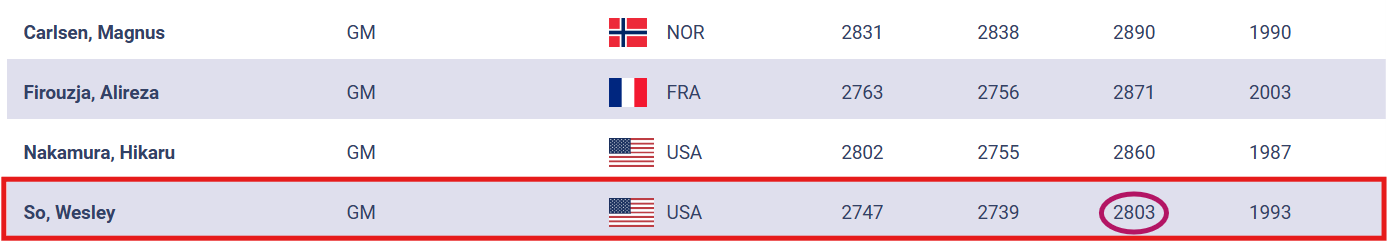
#My model is close to real answer. Here is the link to actual FIDE profile of Wesley So : https://ratings.fide.com/profile/5202213




#Here is interesting post about Wesley So in 2017 : https://www.quora.com/Do-you-think-Wesley-So-is-a-genuine-threat-to-Carlsen-or-is-he-just-another-super-GM-who-is-in-good-form-at-the-moment-which-wont-last

#My thoughts about Wesley So's decline after 2017 can be attributed to several factors:

1.Pressure and Expectations: After his 2017 success, high expectations weighed on him, which might have affected his performance.

2.Shift to Online Chess: During COVID-19, So excelled in blitz and rapid formats (5-10 minutes per game). His shift to quicker play negatively impacted his classical chess performance, where games last 4-8 hours.

3.Increased Competition: As the competition grew fiercer, with players like Magnus Carlsen and Fabiano Caruana solidifying their dominance, So found it harder to maintain top form.

4.Burnout and Focus: A heavy tournament schedule and the mental strain of constant competition may have led to occasional burnout, while adapting to new formats like online chess further disrupted his classical play.

#Despite these challenges, So remains a top-tier player, but these factors likely contributed to his fluctuating results.










---



#Conclusion
This project has been both fascinating and insightful. Analyzing chess data and predicting player performances has deepened my understanding of the game's dynamics and the factors that contribute to success. I found the results to be quite surprising, especially given how accurate the predictions turned out to be. It was rewarding to see how well the model could predict chess player outcomes based on historical data, and this experience has further fueled my passion for chess and data analytics. I hope this project will be really interesting and understandable for people who have never played chess before, as it demonstrates how data can reveal patterns and trends in any field. Overall, this project was not only enjoyable but also provided valuable insights into the world of competitive chess.